*Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017

Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

# Python Machine Learning - Code Examples

# Chapter 10 - Predicting Continuous Target Variables with Regression Analysis

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [1]:
from IPython.display import Image
%matplotlib inline

# Introducing linear regression

## Simple linear regression

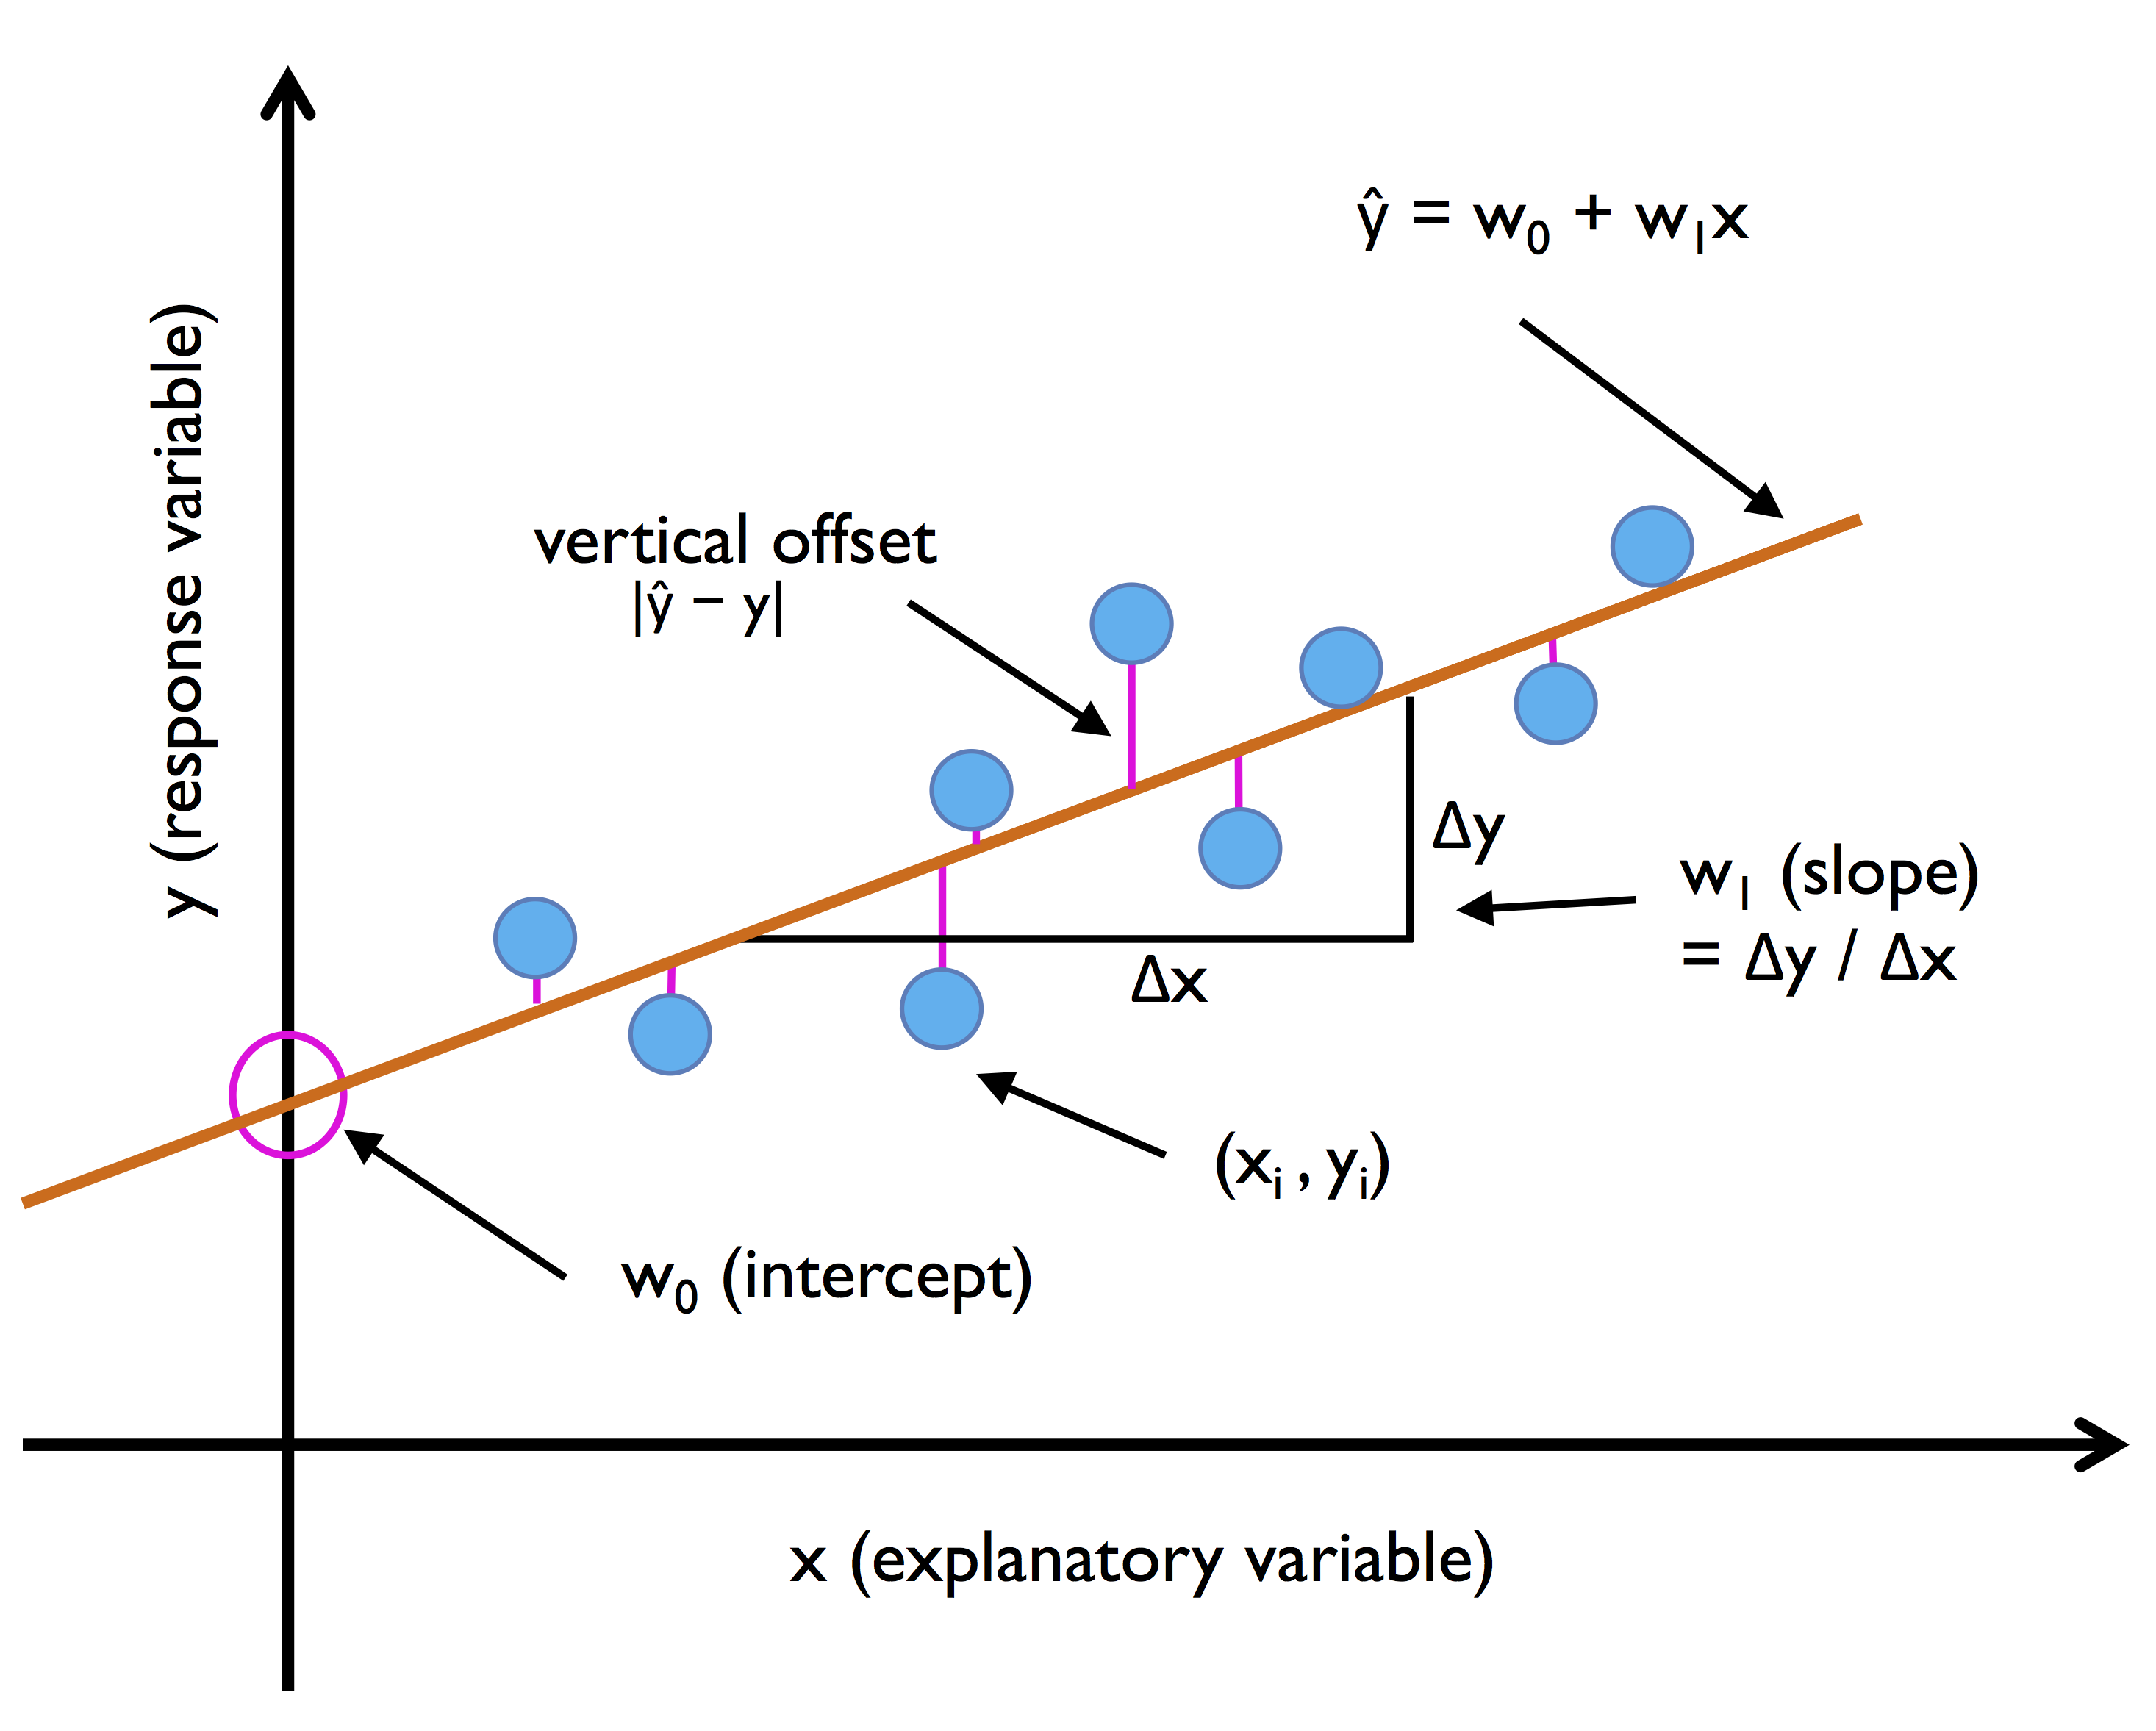

In [2]:
Image(filename='images/10_01.png', width=500) 

## Multiple linear regression

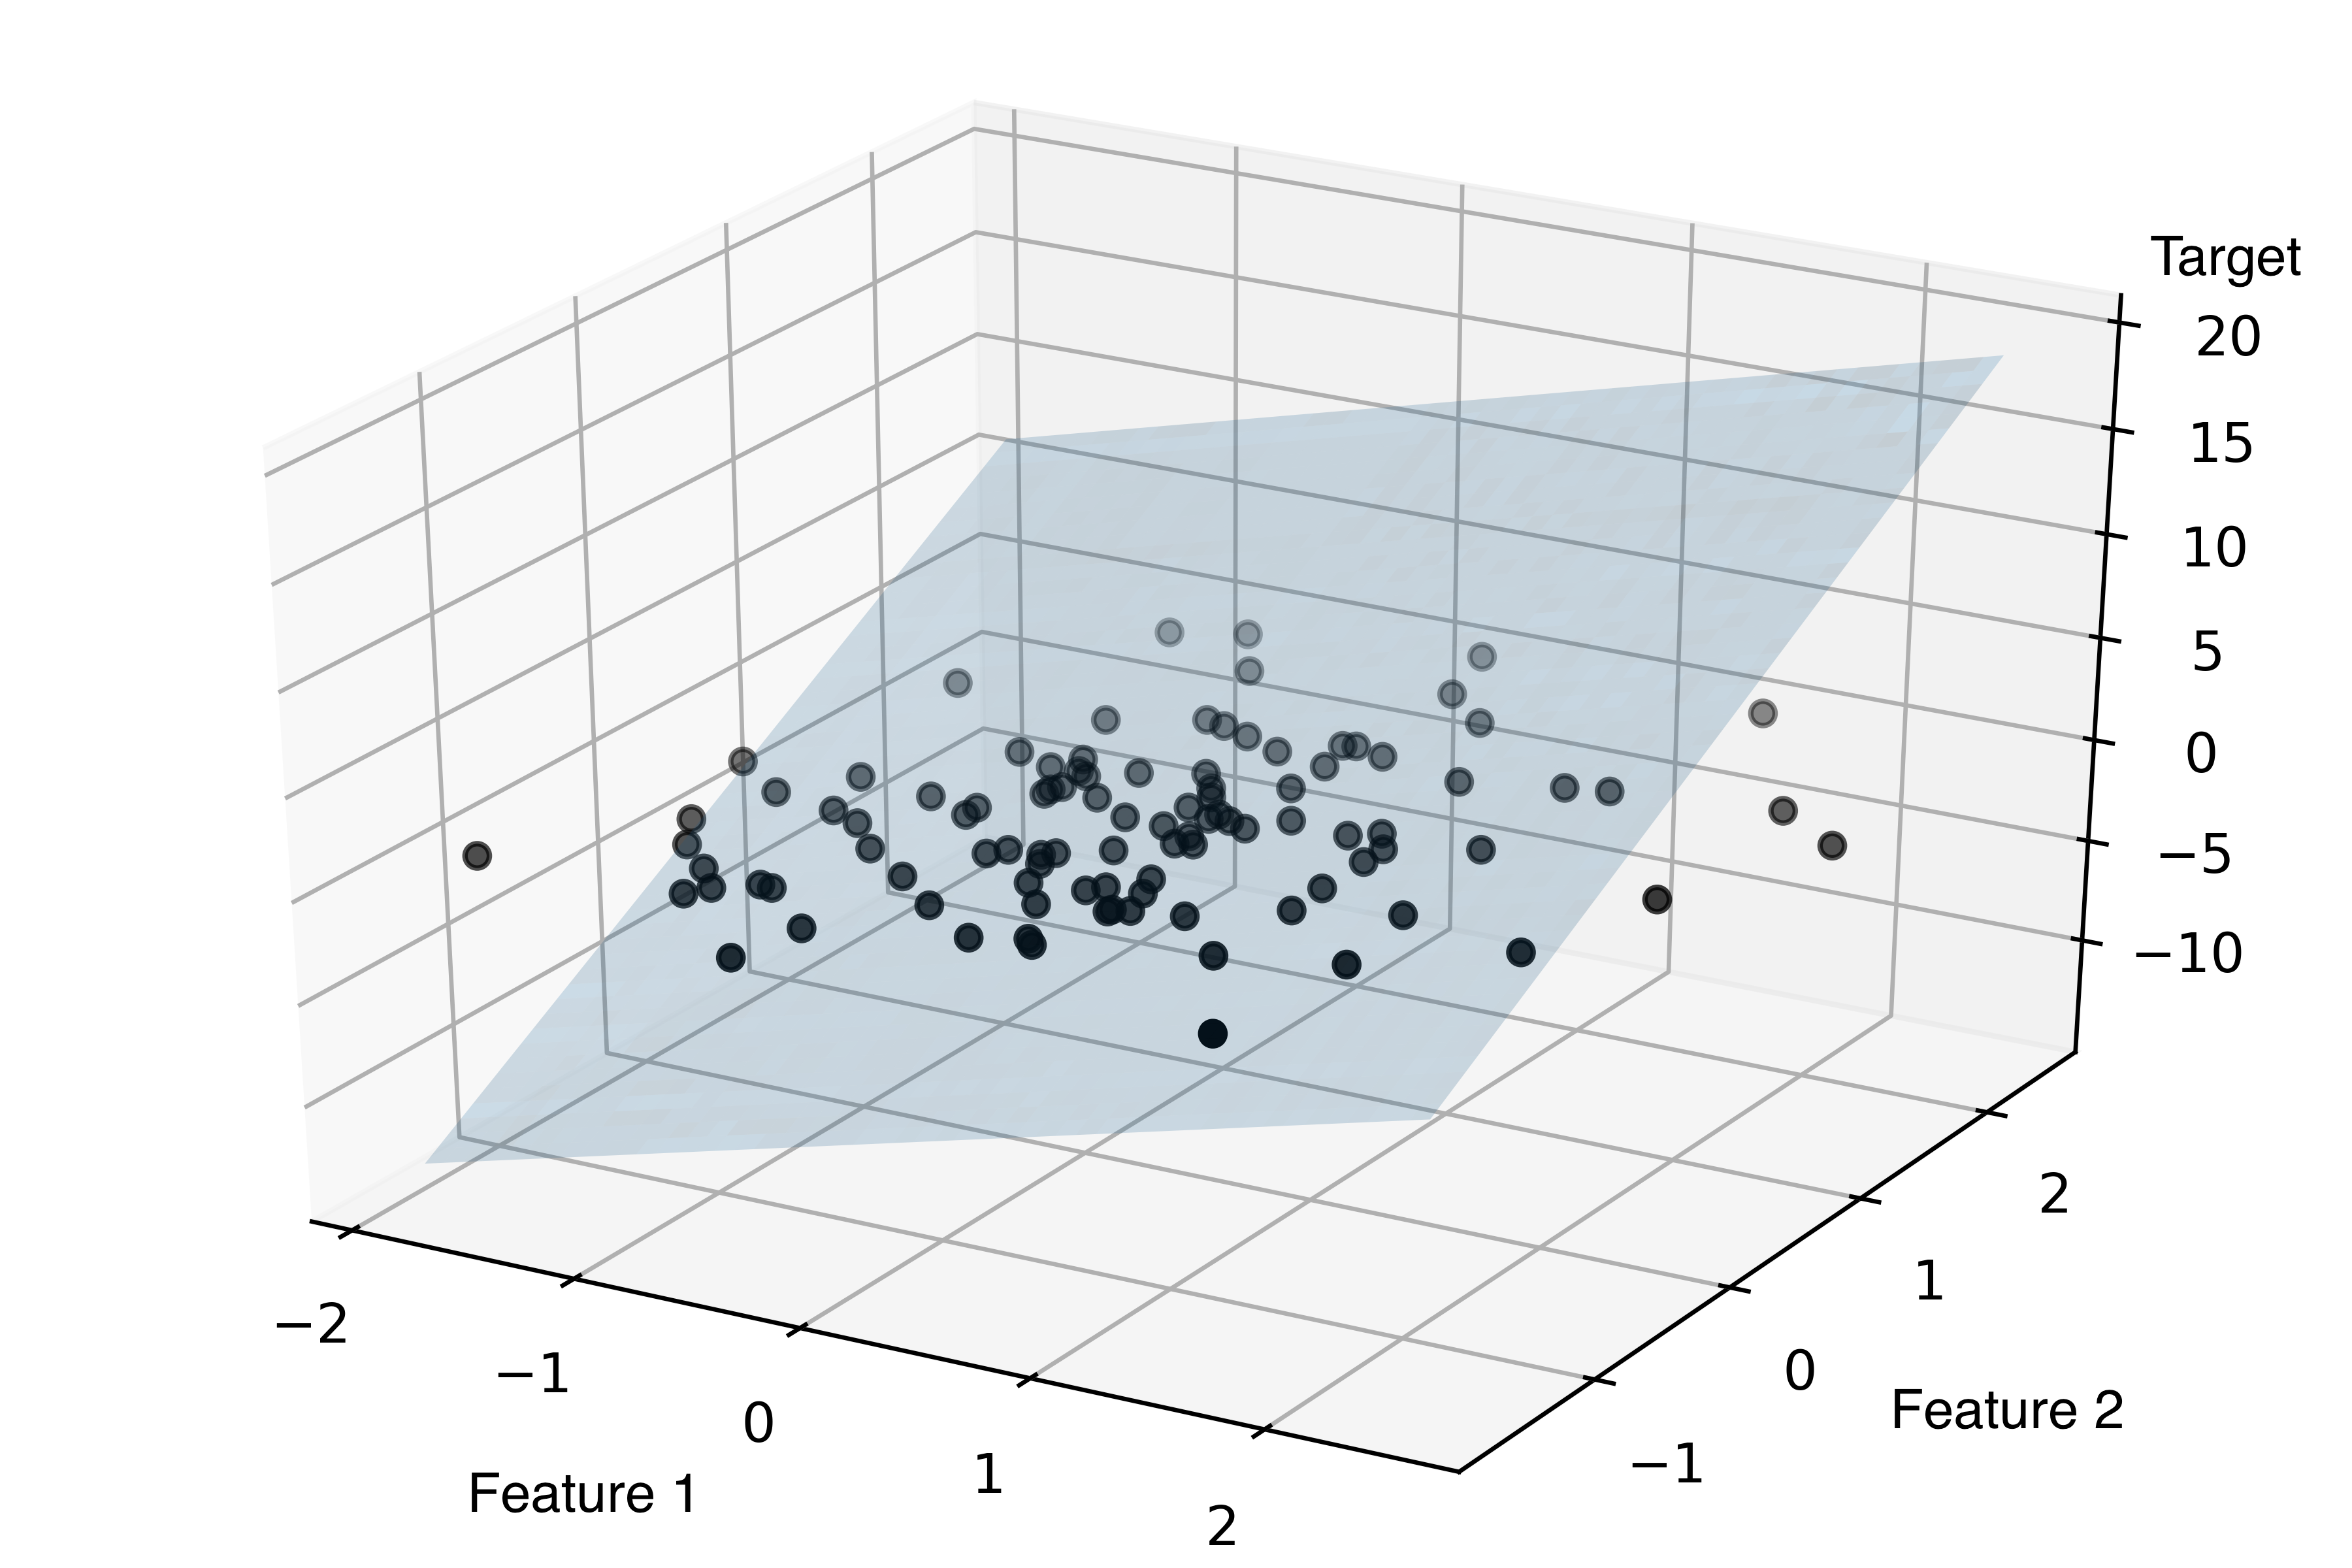

In [3]:
Image(filename='images/10_15.png', width=500) 

<br>
<br>

# Exploring the Housing dataset

## Loading the Housing dataset into a data frame

Description, which was previously available at: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## Visualizing the important characteristics of a dataset

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

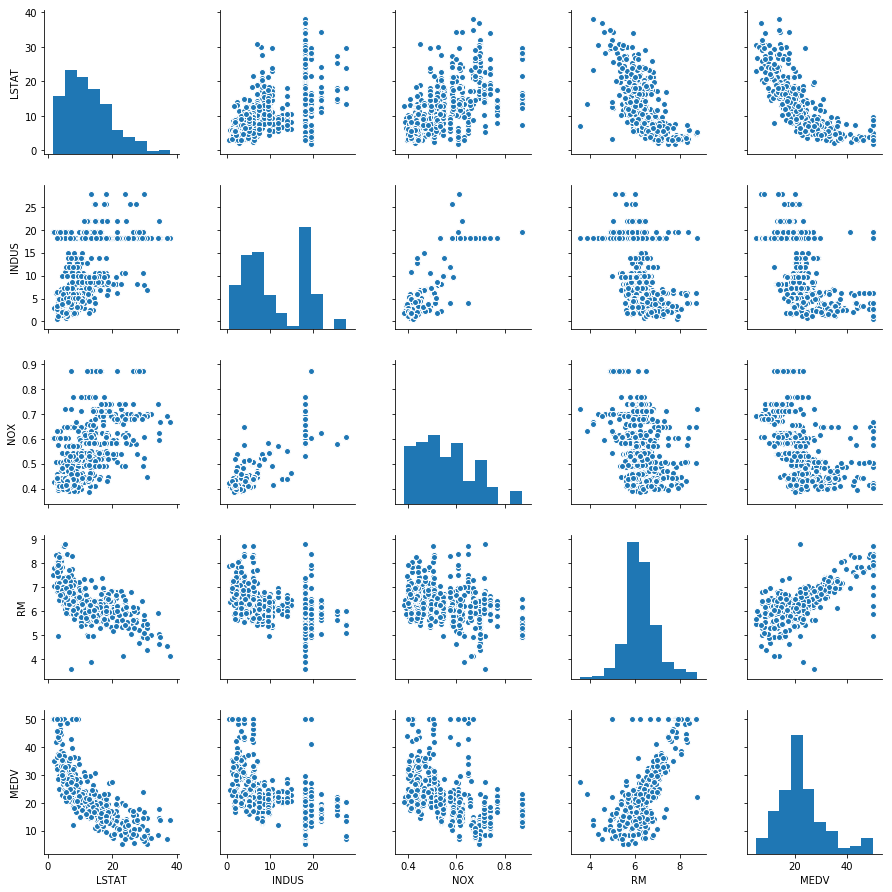

In [6]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

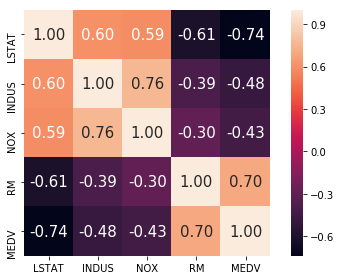

In [7]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

<br>
<br>

## Training a regression model via scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [9]:
X = df[['RM']].values
y = df['MEDV'].values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

In [10]:
slr = LinearRegression()
slr.fit(X_std, y)
y_pred = slr.predict(X_std)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 6.389
Intercept: 22.533


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


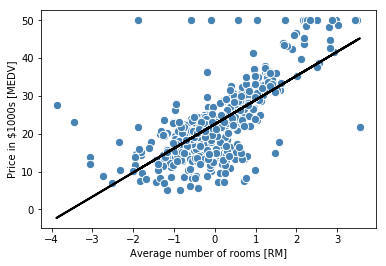

In [11]:
y_pred = slr.predict(X_std)

plt.scatter(X_std, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X_std, y_pred, color='black', lw=2)    
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

# Evaluating the performance of linear regression models

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [13]:
slr = LinearRegression()
sc_x = StandardScaler()

X_std_train = sc_x.fit_transform(X_train)
X_std_test = sc_x.fit_transform(X_test)

slr.fit(X_std_train, y_train)
y_train_pred = slr.predict(X_std_train)
y_test_pred = slr.predict(X_std_test)

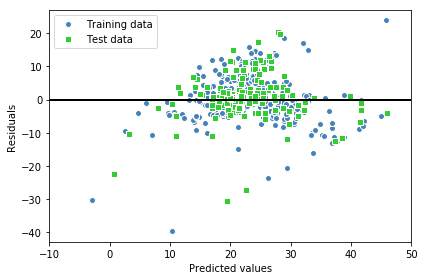

In [14]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 42.158, test: 47.534


# Turning a linear regression model into a curve - polynomial regression

In [16]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [17]:
print(X)
print(y)

[[ 258.]
 [ 270.]
 [ 294.]
 [ 320.]
 [ 342.]
 [ 368.]
 [ 396.]
 [ 446.]
 [ 480.]
 [ 586.]]
[ 236.4  234.4  252.8  298.6  314.2  342.2  360.8  368.   391.2  390.8]


In [18]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [19]:
print(X_quad)

[[  1.00000000e+00   2.58000000e+02   6.65640000e+04]
 [  1.00000000e+00   2.70000000e+02   7.29000000e+04]
 [  1.00000000e+00   2.94000000e+02   8.64360000e+04]
 [  1.00000000e+00   3.20000000e+02   1.02400000e+05]
 [  1.00000000e+00   3.42000000e+02   1.16964000e+05]
 [  1.00000000e+00   3.68000000e+02   1.35424000e+05]
 [  1.00000000e+00   3.96000000e+02   1.56816000e+05]
 [  1.00000000e+00   4.46000000e+02   1.98916000e+05]
 [  1.00000000e+00   4.80000000e+02   2.30400000e+05]
 [  1.00000000e+00   5.86000000e+02   3.43396000e+05]]


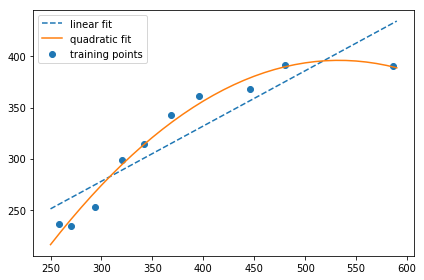

In [20]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [22]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330


## Modeling nonlinear relationships in the Housing Dataset

In [23]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# features to be predicted
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

"""
TODO: 
create simple linear regression and polynomial features degree 2, 3 and 4
fit a linear regression on those features
Get predicted value on four different polynomial features
"""
lin = PolynomialFeatures(degree=1)
quad = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
quartic = PolynomialFeatures(degree=4)

In [24]:
regr.fit(lin.fit_transform(X), y)
y_lin_fit = regr.predict(lin.fit_transform(X_fit))
regr.fit(quad.fit_transform(X), y)
y_quad_fit = regr.predict(quad.fit_transform(X_fit))
regr.fit(cubic.fit_transform(X), y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
regr.fit(quartic.fit_transform(X), y)
y_quartic_fit = regr.predict(quartic.fit_transform(X_fit))

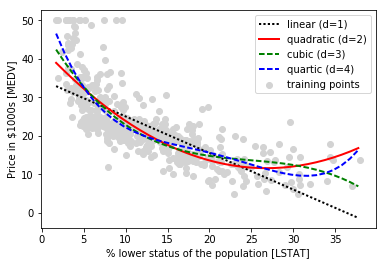

In [25]:

# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1)', 
         color='black', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2)',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3)',
         color='green', 
         lw=2, 
         linestyle='--')

plt.plot(X_fit, y_quartic_fit, 
         label='quartic (d=4)',
         color='blue', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

# Using regularized methods for regression

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ridge coef: [  0.00000000e+00  -6.06635076e-01  -8.14893712e-01   1.10444201e-01
  -6.01760757e-03   1.48023497e-04  -1.35512928e-06]
lasso coef: [  0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -7.22054884e-03
   2.77801913e-04   4.55904255e-07  -8.04546802e-08]


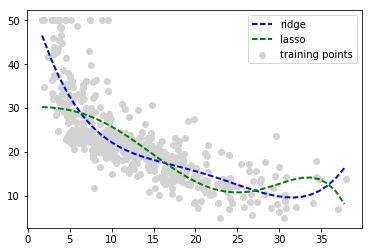

In [26]:
from sklearn.linear_model import Ridge, Lasso

X = df[['LSTAT']].values
y = df['MEDV'].values

reg_param = 100.0

ridge = Ridge(alpha=reg_param)
lasso = Lasso(alpha=reg_param)

quartic = PolynomialFeatures(degree=6)
X_quartic = quartic.fit_transform(X)

# fit the model
ridge.fit(X_quartic, y)
lasso.fit(X_quartic, y)
print("ridge coef: "+ str(ridge.coef_))
print("lasso coef: "+ str(lasso.coef_))

# features to be predicted
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

y_ridge_fit = ridge.predict(quartic.fit_transform(X_fit))
y_lasso_fit = lasso.predict(quartic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_quartic_fit, 
         label='ridge',
         color='blue', 
         lw=2, 
         linestyle='--')

plt.plot(X_fit, y_lasso_fit, 
         label='lasso',
         color='green', 
         lw=2, 
         linestyle='--')

plt.legend(loc='upper right')

plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# select all 13 features
X = df.ix[:, :-1].values
y = df['MEDV'].values

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

reg_param = 1

ridge = Ridge(alpha=reg_param)
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=reg_param)
lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)
"""
TODO:
Rescale X with StandardScaler
train Ridge regression with regularization parameter = 1.0 on X_train data
and then predict on the X_train and X_test data to obtain y_train_pred and y_test_pred
"""



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


'\nTODO:\nRescale X with StandardScaler\ntrain Ridge regression with regularization parameter = 1.0 on X_train data\nand then predict on the X_train and X_test data to obtain y_train_pred and y_test_pred\n'

In [28]:
from sklearn.metrics import mean_squared_error

print("Ridge")
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_ridge),
        mean_squared_error(y_test, y_test_pred_ridge)))

print("Lasso")
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_lasso),
        mean_squared_error(y_test, y_test_pred_lasso)))

Ridge
MSE train: 19.960, test: 27.247
Lasso
MSE train: 26.041, test: 33.407
